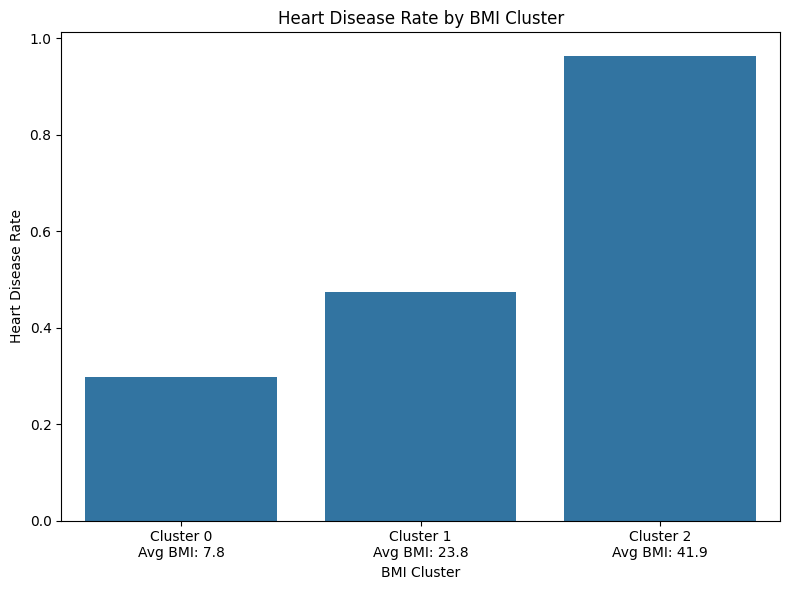

,bmi_cluster,bmi_avg,heart_disease_rate,count
0,0,7.838638,0.296866,3574
1,1,23.796348,0.474200,4593
2,2,41.937003,0.964539,1833


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import time

# Load the dataset
df = pd.read_csv("/content/Heart_Disease_and_Hospitals.csv")

# Select relevant columns
df_clean = df[['bmi', 'heart_disease']].copy()

# Scale BMI for clustering
scaler = StandardScaler()
df_clean['bmi_scaled'] = scaler.fit_transform(df_clean[['bmi']])

# Run K-means with k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_clean['bmi_cluster'] = kmeans.fit_predict(df_clean[['bmi_scaled']])

# Reverse scale for interpretability
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Add original BMI back for reference
df_clean['bmi_original'] = df['bmi']

# Analyze heart disease prevalence in each cluster
cluster_summary = df_clean.groupby('bmi_cluster').agg(
    bmi_avg=('bmi_original', 'mean'),
    heart_disease_rate=('heart_disease', 'mean'),
    count=('heart_disease', 'count')
).reset_index()

# Plot results
plt.figure(figsize=(8, 6))
sns.barplot(x='bmi_cluster', y='heart_disease_rate', data=cluster_summary)
plt.title('Heart Disease Rate by BMI Cluster')
plt.xlabel('BMI Cluster')
plt.ylabel('Heart Disease Rate')
plt.xticks(
    ticks=[0, 1, 2],
    labels=[f"Cluster {i}\nAvg BMI: {bmi:.1f}" for i, bmi in enumerate(cluster_summary['bmi_avg'])]
)
plt.tight_layout()
plt.show()

cluster_summary